In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import glob
import joblib
import pandas as pd
import netCDF4
import sys

In [10]:
def nc_to_df(fn):
    try:
        nc = netCDF4.Dataset(fn)
        cryo = nc.groups['cryomech'].variables
        data_dict = {}
        for key in ['time','temp_oil','temp_water_in','temp_water_out','motor_current','cpu_temp']:
            data_dict[key] = cryo[key][::60]
        df = pd.DataFrame(data_dict)
        print fn,df.shape
        sys.stdout.flush()
    except Exception, e:
        print fn,e
        df = None
    finally:
        try:
            nc.close()
        except:
            pass
    return df

In [11]:
pp = joblib.Parallel(n_jobs=4,verbose=5)

In [25]:
ncfiles=glob.glob('/data/adc/cooldown_logs/201[45]*.nc')
ncfiles.sort()
print len(ncfiles)

811


In [26]:
dfs = pp(joblib.delayed(nc_to_df)(x) for x in ncfiles)

[Parallel(n_jobs=4)]: Done   1 out of 570 | elapsed:    0.1s remaining:   49.0s
[Parallel(n_jobs=4)]: Done 161 out of 811 | elapsed:    1.4s remaining:    5.7s
[Parallel(n_jobs=4)]: Done 324 out of 811 | elapsed:    3.2s remaining:    4.7s
[Parallel(n_jobs=4)]: Done 487 out of 811 | elapsed:    6.7s remaining:    4.5s
[Parallel(n_jobs=4)]: Done 650 out of 811 | elapsed:   32.1s remaining:    7.9s
[Parallel(n_jobs=4)]: Done 811 out of 811 | elapsed:  9.3min finished


/data/adc/cooldown_logs/2014-02-25_15-45-51.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-25_15-21-17.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-25_15-49-00.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-25_15-47-32.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-25_15-49-21.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-26_10-07-22.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-26_10-08-15.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-26_10-34-40.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-26_10-52-28.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-26_11-32-25.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-26_11-58-04.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-26_11-57-11.nc/data/adc/cooldown_logs/2014-02-26_12-18-48.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-26_12-17-57.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-26_12-24-45.nc 'cryomech'
 'cryomech'
/data/adc/cooldown_logs/2014-02-26_15-19-37.nc 'cryomech'
/data/adc/cooldown_logs/2014-02-26_12-20-53.nc 'cryomech'
/data/adc/cool

In [28]:
len(dfs)

811

In [29]:
df = pd.concat([x for x in dfs if x is not None])

In [30]:
df.shape

(221662, 6)

(5, 20)

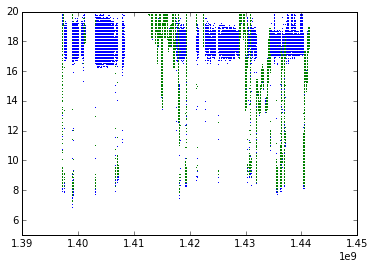

In [46]:
plot(df.time,df.temp_water_in,',')
plot(df.time,df.temp_water_out,',')
ylim(5,20)

(-5, 20)

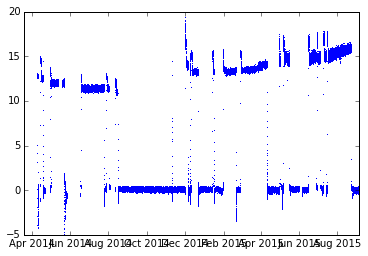

In [39]:
plot([datetime.datetime.fromtimestamp(x) for x in df.time],df.temp_water_out-df.temp_water_in,',')
ylim(-5,20)

(-10, 10)

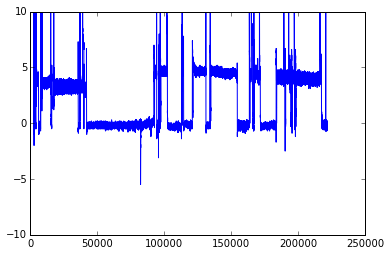

In [41]:
plot(df.temp_oil-df.temp_water_out)
ylim(-10,10)

In [22]:
import datetime

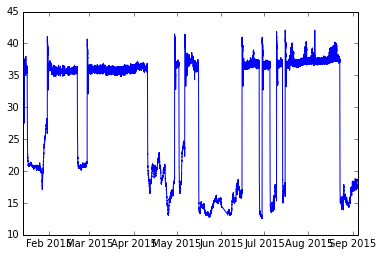

In [24]:
plot([datetime.datetime.fromtimestamp(x) for x in df.time],df.temp_oil)

In [38]:
df.columns

Index([u'cpu_temp', u'motor_current', u'temp_oil', u'temp_water_in', u'temp_water_out', u'time'], dtype='object')